In [1]:
%pip install snowflake-connector-python==2.3.5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, './scripts')
from snowflakeDbConnector import SnowflakeDbConnector

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/snowflake/connector/options.py:78: UserWarning: You have an incompatible version of 'pyarrow' installed (6.0.1), please install a version that adheres to: 'pyarrow<0.18.0,>=0.17.0; extra == "pandas"'
  warn_incompatible_dep('pyarrow', _installed_pyarrow_version.version, _expected_pyarrow_version)


In [3]:
client = 'colgate'
snowflake_db_connector = SnowflakeDbConnector()
database_query = f'''
        use database brands_{client};
        '''
snowflake_db_connector.getResultForQuery(database_query)

,status
0,Statement executed successfully.


In [33]:
dataframe_query = f'''
        select *
        from ams.campaigns_report a
        where CAMPAIGN_ID=194887345412573
        and REPORT_DATE='2020-07-12'
        limit 1000 ;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,CLIENT_ID,PROFILE_ID,CAMPAIGN_ID,CAMPAIGN_NAME,CAMPAIGN_STATUS,CAMPAIGN_BUDGET,PLACEMENT,CLICKS,IMPRESSIONS,BIDPLUS,...,ATTRIBUTEDSALES7D,ATTRIBUTEDSALES14D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES1DSAMESKU,ATTRIBUTEDSALES7DSAMESKU,ATTRIBUTEDSALES14DSAMESKU,ATTRIBUTEDSALES30DSAMESKU,REPORT_DATE,VERSION_ID,CREATION_TIMESTAMP
0,850,1414667831379156,194887345412573,Equity - Brand - All,enabled,21.00,Detail Page on-Amazon,10,5854,True,...,48.40,95.03,95.03,26.67,26.67,26.67,26.67,2020-07-12,850_20200909_2210604,2020-09-09 10:53:04.827
1,850,1414667831379156,194887345412573,Equity - Brand - All,enabled,21.00,Other on-Amazon,5,527,True,...,0.00,8.89,8.89,0.00,0.00,8.89,8.89,2020-07-12,850_20200909_2210604,2020-09-09 10:53:04.827
2,850,1414667831379156,194887345412573,Equity - Brand - All,enabled,21.00,Top of Search on-Amazon,5,357,True,...,40.15,40.15,40.15,8.89,8.89,8.89,8.89,2020-07-12,850_20200909_2210604,2020-09-09 10:53:04.827


In [22]:
dataframe_query = f'''
        select CAMPAIGN_ID,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES14D,cost,report_date,IMPRESSIONS,CLICKS,
        CLICKS*100/IMPRESSIONS as CTR,
        CAMPAIGN_BUDGET,
        CAMPAIGN_STATUS,CAMPAIGN_BUDGET_TYPE,REPORT_DATE
        from ams.campaigns_headline_report a
        where CAMPAIGN_ID=144285031025326232
        limit 1000 ;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,CAMPAIGN_ID,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES14D,COST,REPORT_DATE,IMPRESSIONS,CLICKS,CTR,CAMPAIGN_BUDGET,CAMPAIGN_STATUS,CAMPAIGN_BUDGET_TYPE,REPORT_DATE
0,144285031025326232,None,196.3800000000,45.2900000000,2021-10-19,957,26,2.716823,200.0000000000,enabled,daily,2021-10-19
1,144285031025326232,None,258.8400000000,38.3400000000,2021-10-20,1119,23,2.055407,200.0000000000,enabled,daily,2021-10-20
2,144285031025326232,None,212.2800000000,62.2000000000,2021-10-18,1089,36,3.305785,200.0000000000,enabled,daily,2021-10-18
3,144285031025326232,None,119.4900000000,38.1500000000,2021-10-15,874,18,2.059497,200.0000000000,enabled,daily,2021-10-15
4,144285031025326232,None,255.8600000000,70.4100000000,2021-10-14,1044,36,3.448276,200.0000000000,enabled,daily,2021-10-14
...,...,...,...,...,...,...,...,...,...,...,...,...
303,144285031025326232,None,355.6400000000,43.7000000000,2022-04-22,722,43,5.955679,100.0000000000,enabled,daily,2022-04-22
304,144285031025326232,None,104.4900000000,12.4800000000,2022-04-15,634,14,2.208202,100.0000000000,enabled,daily,2022-04-15
305,144285031025326232,None,111.0000000000,11.8900000000,2022-04-17,723,14,1.936376,100.0000000000,enabled,daily,2022-04-17
306,144285031025326232,None,338.7900000000,46.7500000000,2022-04-23,829,43,5.186972,100.0000000000,enabled,daily,2022-04-23


In [17]:
dataframe_query = f'''
        select distinct ATTRIBUTEDCONVERSIONS7D,
        ATTRIBUTEDCONVERSIONS30DSAMESKU,
        ATTRIBUTEDSALES14D
        from ams.keywords_headline_report a
        limit 1000 ;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,ATTRIBUTEDCONVERSIONS7D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDSALES14D
0,None,None,32.8200000000
1,None,None,14.9700000000
2,None,None,128.9100000000
3,None,None,20.3300000000
4,None,None,7.9600000000
...,...,...,...
995,None,None,31.2400000000
996,None,None,22.2200000000
997,None,None,16.2700000000
998,None,None,38.4700000000


In [29]:
dataframe_query = f'''
        select 
        (b.RPC-b.CPC)*IMPRESSIONS*CTR as Profit
        from
        (
        select a.CAMPAIGN_ID,
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D
        from ams.keywords_headline_report a
        order by  clicks desc
        ) as b
        limit 1000 ;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,PROFIT
0,-5921.797516233779
1,-2844.232703231864
2,-5099.650975469230
3,-3089.767347731115
4,-1192.457236619474
...,...
995,86.198750913228
996,-343.549205681495
997,84.626986380202
998,187.448924815137


In [27]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,1)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (NVL(COST,0)/NVL(CLICKS,1)) as CPC,
        (ATTRIBUTEDSALES14D/NVL(CLICKS,1)) as RPC
        from ams.keywords_headline_report a
        order by Clicks desc
        limit 1000 ;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,CAMPAIGN_ID,CTR,IMPRESSIONS,CPC,RPC
0,144388476918681262,0.007483,92073,14.671074020319,6.076081277213
1,144388476918681262,0.003479,158091,11.568272727273,6.396927272727
2,144388476918681262,0.004828,95071,15.879324618736,4.769041394336
3,144151752304440377,0.009946,32273,14.544049844237,4.918224299065
4,144151752304440377,0.007164,42294,9.206369636964,5.270792079208
...,...,...,...,...,...
995,144168307487839738,0.001739,30469,1.513584905660,3.110754716981
996,144151752304440377,0.002127,24914,3.084905660377,1.852075471698
997,144283933680856271,0.002415,21947,3.323584905660,2.354150943396
998,144151752304440377,0.001871,28325,4.332641509434,3.008867924528


In [117]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D
        from ams.keywords_headline_report a
        where ATTRIBUTEDSALES14D>COST
        order by  clicks desc
        limit 5000 ;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,CAMPAIGN_ID,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,ATTRIBUTEDSALES14D
0,144128244260792017,0.003908,50918,2.756683417085,548.5800000000,199,3.247135678392,646.1800000000
1,144388476918681262,0.002526,77998,5.117411167513,1008.1300000000,197,5.510000000000,1085.4700000000
2,144283933680856271,0.009887,18003,3.709775280899,660.3400000000,178,4.575561797753,814.4500000000
3,144283933680856271,0.007402,21482,3.638679245283,578.5500000000,159,4.198301886792,667.5300000000
4,144192165908506174,0.007405,20662,6.269477124183,959.2300000000,153,6.343725490196,970.5900000000
...,...,...,...,...,...,...,...,...
4995,144293452852304494,0.004248,2825,3.714166666667,44.5700000000,12,5.405000000000,64.8600000000
4996,144285031025326232,0.028037,428,0.897500000000,10.7700000000,12,11.351666666667,136.2200000000
4997,144141046337842727,0.008746,1372,1.270000000000,15.2400000000,12,7.243333333333,86.9200000000
4998,144283933680856271,0.011461,1047,3.934166666667,47.2100000000,12,7.866666666667,94.4000000000


In [10]:
keywords_report_df2.corr()

,CAMPAIGN_ID,IMPRESSIONS,CLICKS
CAMPAIGN_ID,1.000000,-0.005785,0.034688
IMPRESSIONS,-0.005785,1.000000,0.509201
CLICKS,0.034688,0.509201,1.000000


In [31]:
keywords_report_df2['COST']=keywords_report_df2['COST'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDSALES14D']=keywords_report_df2['ATTRIBUTEDSALES14D'].astype(str).astype(float)
keywords_report_df2['CTR']=keywords_report_df2['CTR'].astype(str).astype(float)


In [12]:
keywords_report_df2.corr()

,CAMPAIGN_ID,IMPRESSIONS,COST,CLICKS,ATTRIBUTEDSALES14D
CAMPAIGN_ID,1.000000,-0.005785,0.157783,0.034688,0.091773
IMPRESSIONS,-0.005785,1.000000,0.184702,0.509201,-0.200007
COST,0.157783,0.184702,1.000000,0.668822,0.509612
CLICKS,0.034688,0.509201,0.668822,1.000000,0.496414
ATTRIBUTEDSALES14D,0.091773,-0.200007,0.509612,0.496414,1.000000


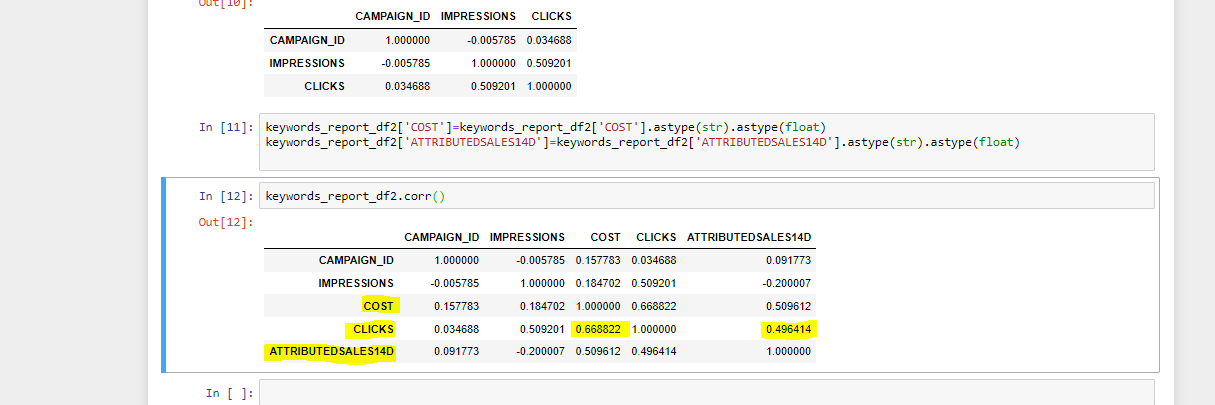

### we have to use this correlation to predict Sales, Cost 

In [32]:
keywords_report_df2.corr()

,CAMPAIGN_ID,CTR,IMPRESSIONS,COST,CLICKS,ATTRIBUTEDSALES14D
CAMPAIGN_ID,1.000000,-0.057124,-0.089646,-0.040449,-0.168142,-0.139239
CTR,-0.057124,1.000000,-0.346441,-0.148237,-0.113688,0.207474
IMPRESSIONS,-0.089646,-0.346441,1.000000,0.345523,0.580953,0.105308
COST,-0.040449,-0.148237,0.345523,1.000000,0.746803,0.589903
CLICKS,-0.168142,-0.113688,0.580953,0.746803,1.000000,0.660936
ATTRIBUTEDSALES14D,-0.139239,0.207474,0.105308,0.589903,0.660936,1.000000


In [51]:
source_q='''
        select a.CAMPAIGN_ID,
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D
        from ams.keywords_headline_report a
        where ATTRIBUTEDSALES14D>COST
        order by  clicks desc
        '''

In [54]:
db_count = f'''
        select count(*) from
        (
        {source_q}
        );
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(db_count)

keywords_report_df2

,COUNT(*)
0,50498


In [56]:
count_query=keywords_report_df2.iloc[0,0]
count_query

50498

In [52]:
dataframe_query = f'''
        {source_q}
        limit 1000 offset 1000;
        '''

keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)

keywords_report_df2

,CAMPAIGN_ID,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,ATTRIBUTEDSALES14D
0,144243366878574968,0.024148,1408,1.098823529412,37.3600000000,34,7.885882352941,268.1200000000
1,144125035403397114,0.003893,8476,1.100303030303,36.3100000000,33,2.783636363636,91.8600000000
2,144140011964622824,0.005855,5636,1.913636363636,63.1500000000,33,5.485454545455,181.0200000000
3,144168307487839738,0.002828,11669,1.816363636364,59.9400000000,33,2.003939393939,66.1300000000
4,144243366878574968,0.029946,1102,1.232727272727,40.6800000000,33,8.468787878788,279.4700000000
...,...,...,...,...,...,...,...,...
995,144128652025337642,0.006091,3612,2.631818181818,57.9000000000,22,12.771818181818,280.9800000000
996,144285031025326232,0.041353,532,2.339090909091,51.4600000000,22,10.085909090909,221.8900000000
997,144205575997859152,0.001978,11125,0.856818181818,18.8500000000,22,4.751818181818,104.5400000000
998,144163336369327279,0.038128,577,2.076363636364,45.6800000000,22,4.090454545455,89.9900000000


## Applying RF Regression

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
keywords_report_df2.columns

Index(['CAMPAIGN_ID', 'CTR', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS', 'RPC',
       'ATTRIBUTEDSALES14D'],
      dtype='object')

###  predicting sales= (impressions, clicks)

In [163]:
X = keywords_report_df2[['IMPRESSIONS','COST']]
y_c = keywords_report_df2['COST']
y_s = keywords_report_df2['ATTRIBUTEDSALES14D']

X_train,X_test,y_train,y_test = train_test_split(X,y_s,test_size=0.15,random_state=2)

##### Combining all cells for sales predictions

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


##### cell 3
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

rf_sales = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_sales.fit(X_train, y_train);

Training Features Shape: (4250, 2)
Training Labels Shape: (4250,)
Testing Features Shape: (750, 2)
Testing Labels Shape: (750,)


In [164]:
####testing dtypes compatibilitty

#Got error before

y_test=y_test.astype(float)
# predictions[1].type()

In [165]:
y_test=y_test.astype(float)

In [166]:
######################################

# Use the forest's predict method on the test data
predictions = rf_sales.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



######################################

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 61.53 degrees.
Accuracy: 40.94 %.


### Predicting Cost= (*impressions, clicks*)

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y_c,test_size=0.15,random_state=2)

##### Combining all cells for sales predictions

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


##### cell 3
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

rf_cost = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_cost.fit(X_train, y_train);

Training Features Shape: (4250, 2)
Training Labels Shape: (4250,)
Testing Features Shape: (750, 2)
Testing Labels Shape: (750,)


In [168]:
######################################

# Use the forest's predict method on the test data
predictions = rf_cost.predict(X_test)


In [169]:
y_test=y_test.astype(float)

In [170]:
# rf_cost.predict(X_test)
X_test

,IMPRESSIONS,COST
3566,588,29.9000000000
4252,13302,17.6300000000
1918,6839,35.6700000000
4111,768,12.1100000000
1471,5547,33.1700000000
...,...,...
4189,479,48.7800000000
4600,520,31.9000000000
4339,8486,11.7000000000
4248,6143,55.7900000000


In [171]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2))



######################################

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.04
Accuracy: 99.95 %.


In [172]:
mape

3566    0.000435
4252    0.054169
1918    0.038127
4111    0.038481
1471    0.007597
          ...   
4189    0.040467
4600    0.010658
4339    0.137350
4248    0.032730
2632    0.001816
Name: COST, Length: 750, dtype: float64

###### Got 2 models to predict costs, and sales based on impressions and clicks, for a particular client 
Addition of -- campaign remaining, this will make sure, we are not making any coarser predictions


### Planning for (big, budget)===> impression, clicks

In [4]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        ((ATTRIBUTEDSALES14D/CLICKS) -(COST/CLICKS)) *IMPRESSIONS* ((NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0))) as Profit,
        ((ATTRIBUTEDSALES14D/CLICKS) -(COST/CLICKS))* CLICKS as Profit_1,
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D as sales,
        KEYWORDBID as bid,
        KEYWORDSTATUS
        from ams.keywords_headline_report a
        where ATTRIBUTEDSALES14D>COST
        order by  clicks desc
        limit 5000 ;
        '''

df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,PROFIT,PROFIT_1,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,KEYWORDSTATUS
0,144128244260792017,97.593890926726,97.600000000093,0.003908,50918,2.756683417085,548.5800000000,199,3.247135678392,646.1800000000,2.6600000000,Enabled
1,144388476918681262,77.349009128467,77.339999999939,0.002526,77998,5.117411167513,1008.1300000000,197,5.510000000000,1085.4700000000,5.0000000000,Enabled
2,144283933680856271,154.106243352315,154.110000000012,0.009887,18003,3.709775280899,660.3400000000,178,4.575561797753,814.4500000000,20.0000000000,Enabled
3,144283933680856271,88.985464155403,88.979999999931,0.007402,21482,3.638679245283,578.5500000000,159,4.198301886792,667.5300000000,20.0000000000,Enabled
4,144192165908506174,11.360156664041,11.359999999989,0.007405,20662,6.269477124183,959.2300000000,153,6.343725490196,970.5900000000,11.5000000000,Enabled
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,144339112735485253,3.260027166671,3.260000000004,0.007742,1550,3.975833333333,47.7100000000,12,4.247500000000,50.9700000000,6.0000000000,Enabled
4996,144191467259384329,10.649015762500,10.650000000000,0.002759,4349,0.575833333333,6.9100000000,12,1.463333333333,17.5600000000,3.1300000000,Enabled
4997,144149010364083754,45.970000000008,45.970000000008,0.075000,160,2.135833333333,25.6300000000,12,5.966666666667,71.6000000000,1.2400000000,Enabled
4998,144118999929249270,0.810051165000,0.810000000000,0.005753,2086,2.420833333333,29.0500000000,12,2.488333333333,29.8600000000,3.0000000000,Enabled


In [5]:
df_BB.columns

Index(['CAMPAIGN_ID', 'PROFIT', 'PROFIT_1', 'CTR', 'IMPRESSIONS', 'CPC',
       'COST', 'CLICKS', 'RPC', 'SALES', 'BID', 'KEYWORDSTATUS'],
      dtype='object')

In [ ]:
df_BB.drop([CAMPAIGN_ID,KEYWORDSTATUS,])




In [90]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        ((ATTRIBUTEDSALES14D/CLICKS)-(COST/CLICKS))*clicks as Profit,    
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D as sales,
        KEYWORDBID as bid
        from ams.keywords_headline_report a
        where ATTRIBUTEDSALES14D>COST
        order by  clicks desc
        limit 5000;
        '''

df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID
0,144128244260792017,97.600000000093,0.003908,50918,2.756683417085,548.5800000000,199,3.247135678392,646.1800000000,2.6600000000
1,144388476918681262,77.339999999939,0.002526,77998,5.117411167513,1008.1300000000,197,5.510000000000,1085.4700000000,5.0000000000
2,144283933680856271,154.110000000012,0.009887,18003,3.709775280899,660.3400000000,178,4.575561797753,814.4500000000,20.0000000000
3,144283933680856271,88.979999999931,0.007402,21482,3.638679245283,578.5500000000,159,4.198301886792,667.5300000000,20.0000000000
4,144192165908506174,11.359999999989,0.007405,20662,6.269477124183,959.2300000000,153,6.343725490196,970.5900000000,11.5000000000
...,...,...,...,...,...,...,...,...,...,...
4995,144375196674479666,5.420000000004,0.005911,2030,2.270000000000,27.2400000000,12,2.721666666667,32.6600000000,3.0000000000
4996,144209493587740239,57.940000000008,0.033333,360,2.625833333333,31.5100000000,12,7.454166666667,89.4500000000,4.5000000000
4997,144388476918681262,63.669999999996,0.006525,1839,11.345000000000,136.1400000000,12,16.650833333333,199.8100000000,9.0000000000
4998,144163336369327279,29.469999999996,0.017831,673,1.264166666667,15.1700000000,12,3.720000000000,44.6400000000,8.6700000000


In [6]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        REPORT_DATE,
        CAMPAIGN_BUDGET
        from ams.campaigns_headline_report a
        order by  CAMPAIGN_BUDGET
        limit 5000;
        '''

df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,REPORT_DATE,CAMPAIGN_BUDGET
0,144233385004901923,2021-10-17,1.0000000000
1,144233385004901923,2021-11-03,1.0000000000
2,144233385004901923,2021-10-27,1.0000000000
3,144233385004901923,2021-10-29,1.0000000000
4,144233385004901923,2021-09-27,1.0000000000
...,...,...,...
4995,144183247791659959,2021-08-05,10.0000000000
4996,144167300007731556,2021-11-18,10.0000000000
4997,144214699868389336,2022-05-03,10.0000000000
4998,144340582835401154,2021-07-03,10.0000000000


In [7]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        ((ATTRIBUTEDSALES14D/CLICKS)-(COST/CLICKS))*clicks as Profit,    
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D as sales,
        KEYWORDBID as bid,
        b.CAMPAIGN_BUDGET,
        a.REPORT_DATE
        from ams.keywords_headline_report a
        join (
        select CAMPAIGN_ID,
        REPORT_DATE,
        CAMPAIGN_BUDGET
        from ams.campaigns_headline_report 
        ) b 
        on (a.CAMPAIGN_ID=b.CAMPAIGN_ID and a.REPORT_DATE=b.REPORT_DATE)
        where ATTRIBUTEDSALES14D>COST
        and b.CAMPAIGN_BUDGET> a.COST
        order by  clicks desc
        limit 10000;
        '''

df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE
0,144128244260792017,97.600000000093,0.003908,50918,2.756683417085,548.5800000000,199,3.247135678392,646.1800000000,2.6600000000,576.1900000000,2022-04-20
1,144283933680856271,154.110000000012,0.009887,18003,3.709775280899,660.3400000000,178,4.575561797753,814.4500000000,20.0000000000,850.0000000000,2022-03-05
2,144283933680856271,88.979999999931,0.007402,21482,3.638679245283,578.5500000000,159,4.198301886792,667.5300000000,20.0000000000,850.0000000000,2022-03-07
3,144283933680856271,44.009999999994,0.006707,21919,3.664353741497,538.6600000000,147,3.963741496599,582.6700000000,20.0000000000,850.0000000000,2022-03-06
4,144283933680856271,34.620000000040,0.005341,26210,3.346000000000,468.4400000000,140,3.593285714286,503.0600000000,20.0000000000,850.0000000000,2022-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,144246748233225147,10.230000000000,0.024896,241,2.288333333333,13.7300000000,6,3.993333333333,23.9600000000,3.0000000000,50.0000000000,2021-06-06
9996,144125950763232716,63.690000000000,0.133333,45,1.866666666667,11.2000000000,6,12.481666666667,74.8900000000,3.6700000000,200.0000000000,2021-10-03
9997,144140011964622824,8.059999999998,0.005561,1079,2.420000000000,14.5200000000,6,3.763333333333,22.5800000000,3.5000000000,75.0000000000,2021-09-17
9998,144141046337842727,26.950000000002,0.047244,127,1.495000000000,8.9700000000,6,5.986666666667,35.9200000000,1.7500000000,55.0000000000,2020-09-17


In [66]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        ((ATTRIBUTEDSALES14D/CLICKS)-(COST/CLICKS))*clicks as Profit,    
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS) as RPC,
        ATTRIBUTEDSALES14D as sales,
        KEYWORDBID as bid,
        b.CAMPAIGN_BUDGET,
        a.REPORT_DATE
        from ams.keywords_headline_report a
        join (
        select CAMPAIGN_ID,
        REPORT_DATE,
        CAMPAIGN_BUDGET
        from ams.campaigns_headline_report 
        ) b 
        on (a.CAMPAIGN_ID=b.CAMPAIGN_ID and a.REPORT_DATE=b.REPORT_DATE)
        where ATTRIBUTEDSALES14D>COST
        and b.CAMPAIGN_BUDGET> a.COST
        and CLICKS>0
        and a.CAMPAIGN_ID=144375196674479666
        order by  clicks desc
        limit 10000;
        '''

df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE
0,144375196674479666,22.320000000000,0.001480,24321,1.529722222222,55.0700000000,36,2.149722222222,77.3900000000,2.2500000000,75.0000000000,2020-11-30
1,144375196674479666,1.050000000012,0.002019,17835,1.737222222222,62.5400000000,36,1.766388888889,63.5900000000,2.7000000000,200.0000000000,2021-04-07
2,144375196674479666,11.300000000030,0.003250,10768,2.474571428571,86.6100000000,35,2.797428571429,97.9100000000,3.0000000000,100.0000000000,2021-08-28
3,144375196674479666,10.180000000004,0.010278,3308,2.811470588235,95.5900000000,34,3.110882352941,105.7700000000,3.0000000000,100.0000000000,2021-08-12
4,144375196674479666,25.180000000000,0.001365,23435,1.657500000000,53.0400000000,32,2.444375000000,78.2200000000,2.2500000000,75.0000000000,2020-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...
656,144375196674479666,19.450000000000,0.038462,26,1.520000000000,1.5200000000,1,20.970000000000,20.9700000000,1.5200000000,32.1100000000,2022-03-22
657,144375196674479666,13.060000000000,0.004484,223,1.910000000000,1.9100000000,1,14.970000000000,14.9700000000,1.9100000000,32.1100000000,2022-03-22
658,144375196674479666,13.240000000000,0.001508,663,4.730000000000,4.7300000000,1,17.970000000000,17.9700000000,6.0000000000,95.0000000000,2021-04-14
659,144375196674479666,25.210000000000,0.005263,190,4.810000000000,4.8100000000,1,30.020000000000,30.0200000000,0.8500000000,12.8000000000,2022-02-16


### SKIP to 25 cells down to see its effect--> in training

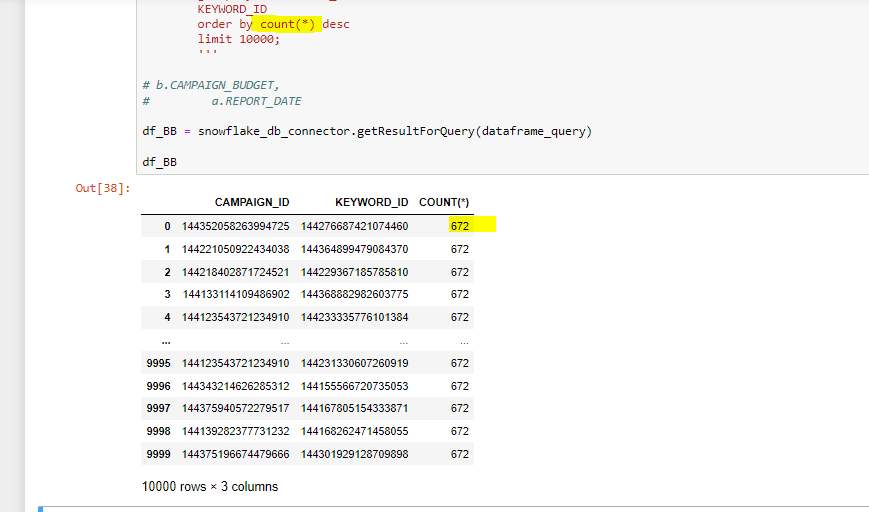

In [8]:
df_BB_copy=df_BB.copy(deep=True)

In [102]:
df_BB.columns

Index(['CAMPAIGN_ID', 'PROFIT', 'CTR', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS',
       'RPC', 'SALES', 'BID', 'CAMPAIGN_BUDGET', 'REPORT_DATE'],
      dtype='object')

In [9]:
df_BB[df_BB['CAMPAIGN_BUDGET'] > df_BB['COST']]

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE
0,144128244260792017,97.600000000093,0.003908,50918,2.756683417085,548.5800000000,199,3.247135678392,646.1800000000,2.6600000000,576.1900000000,2022-04-20
1,144283933680856271,154.110000000012,0.009887,18003,3.709775280899,660.3400000000,178,4.575561797753,814.4500000000,20.0000000000,850.0000000000,2022-03-05
2,144283933680856271,88.979999999931,0.007402,21482,3.638679245283,578.5500000000,159,4.198301886792,667.5300000000,20.0000000000,850.0000000000,2022-03-07
3,144283933680856271,44.009999999994,0.006707,21919,3.664353741497,538.6600000000,147,3.963741496599,582.6700000000,20.0000000000,850.0000000000,2022-03-06
4,144283933680856271,34.620000000040,0.005341,26210,3.346000000000,468.4400000000,140,3.593285714286,503.0600000000,20.0000000000,850.0000000000,2022-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,144246748233225147,10.230000000000,0.024896,241,2.288333333333,13.7300000000,6,3.993333333333,23.9600000000,3.0000000000,50.0000000000,2021-06-06
9996,144125950763232716,63.690000000000,0.133333,45,1.866666666667,11.2000000000,6,12.481666666667,74.8900000000,3.6700000000,200.0000000000,2021-10-03
9997,144140011964622824,8.059999999998,0.005561,1079,2.420000000000,14.5200000000,6,3.763333333333,22.5800000000,3.5000000000,75.0000000000,2021-09-17
9998,144141046337842727,26.950000000002,0.047244,127,1.495000000000,8.9700000000,6,5.986666666667,35.9200000000,1.7500000000,55.0000000000,2020-09-17


In [112]:
df_BB=df_BB[['CTR', 'IMPRESSIONS','CLICKS','BID', 'CAMPAIGN_BUDGET']]

In [68]:
# df_BB['CAMPAIGN_ID', 'PROFIT', 'CTR', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS',
#        'RPC', 'SALES', 'BID', 'CAMPAIGN_BUDGET', 'REPORT_DATE']


df_BB['CAMPAIGN_ID']=df_BB['CAMPAIGN_ID'].astype(object)
df_BB['CAMPAIGN_BUDGET']=df_BB['CAMPAIGN_BUDGET'].astype(float)
df_BB['BID']=df_BB['BID'].astype(float)
df_BB['CTR']=df_BB['CTR'].astype(float)
df_BB['PROFIT']=df_BB['PROFIT'].astype(float)
df_BB['COST']=df_BB['COST'].astype(float)
df_BB['SALES']=df_BB['SALES'].astype(float)

In [69]:
df_BB.corr()

,PROFIT,CTR,IMPRESSIONS,COST,CLICKS,SALES,BID,CAMPAIGN_BUDGET
PROFIT,1.000000,-0.026574,0.021428,0.071964,0.107227,0.731318,-0.069014,-0.050080
CTR,-0.026574,1.000000,-0.134097,-0.153679,-0.136331,-0.123214,-0.062527,-0.056753
IMPRESSIONS,0.021428,-0.134097,1.000000,0.592211,0.743658,0.419576,-0.187517,0.005039
COST,0.071964,-0.153679,0.592211,1.000000,0.894781,0.732897,0.034452,0.152912
CLICKS,0.107227,-0.136331,0.743658,0.894781,1.000000,0.685000,-0.176387,0.035221
SALES,0.731318,-0.123214,0.419576,0.732897,0.685000,1.000000,-0.023516,0.070403
BID,-0.069014,-0.062527,-0.187517,0.034452,-0.176387,-0.023516,1.000000,0.275412
CAMPAIGN_BUDGET,-0.050080,-0.056753,0.005039,0.152912,0.035221,0.070403,0.275412,1.000000


In [28]:
df_BB.corr()

,PROFIT,CTR,IMPRESSIONS,COST,CLICKS,SALES,BID,CAMPAIGN_BUDGET
PROFIT,1.000000,0.205546,-0.012556,0.138015,0.380321,0.870568,-0.043634,-0.004737
CTR,0.205546,1.000000,-0.271444,-0.156975,-0.129017,0.086862,-0.107088,-0.068410
IMPRESSIONS,-0.012556,-0.271444,1.000000,0.420178,0.624829,0.198676,-0.063041,0.111844
COST,0.138015,-0.156975,0.420178,1.000000,0.788240,0.607491,0.387370,0.210415
CLICKS,0.380321,-0.129017,0.624829,0.788240,1.000000,0.696618,0.069393,0.140661
SALES,0.870568,0.086862,0.198676,0.607491,0.696618,1.000000,0.157452,0.100736
BID,-0.043634,-0.107088,-0.063041,0.387370,0.069393,0.157452,1.000000,0.172799
CAMPAIGN_BUDGET,-0.004737,-0.068410,0.111844,0.210415,0.140661,0.100736,0.172799,1.000000


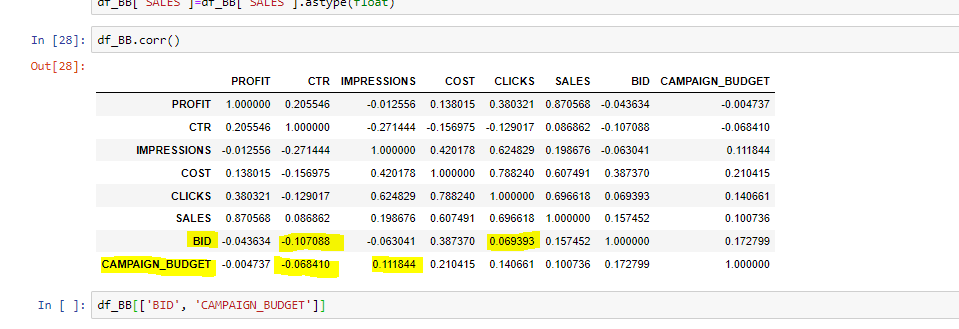


The loose correation tells, bid & budget are so unrelated with impressions and Clicks

In [29]:
df_BB[['BID', 'CAMPAIGN_BUDGET']]

,BID,CAMPAIGN_BUDGET
0,2.66,576.19
1,20.00,850.00
2,20.00,850.00
3,20.00,850.00
4,20.00,850.00
...,...,...
9995,3.00,50.00
9996,3.67,200.00
9997,3.50,75.00
9998,1.75,55.00


In [121]:
X_I=df_BB[['BID', 'CAMPAIGN_BUDGET']]
X_C=df_BB[['IMPRESSIONS','BID', 'CAMPAIGN_BUDGET']]

Y_I=df_BB['IMPRESSIONS']
Y_C= df_BB['CLICKS']

In [10]:
X=df_BB[['BID', 'CAMPAIGN_BUDGET']]
Y= df_BB['CTR']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

##### Combining all cells for sales predictions

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (9000, 2)
Training Labels Shape: (9000,)
Testing Features Shape: (1000, 2)
Testing Labels Shape: (1000,)


In [14]:
##### cell 3
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

rf_Impression = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_Impression.fit(X_train, y_train);

In [26]:
# Use the forest's predict method on the test data
predictions = rf_Impression.predict(X_test)
# Calculate the absolute errors
y_test=y_test.astype(float)

errors = abs(predictions - y_test)

# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# # Calculate the absolute errors
# errors = abs(predictions - y_test)

# # Get Mean Square Error
# print('Mean Absolute Error:', round(np.mean(errors), 2))


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 0.01 degrees.
Accuracy: 11.05 %.


Trying a model to predict impression and clicks

Mean Absolute Error: 0.01 degrees.


Accuracy: 11.05 %.


In [65]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        ((ATTRIBUTEDSALES14D/CLICKS+1)-(COST/CLICKS+1))*clicks as Profit,    
        (NVL(a.CLICKS,0)/NVL(a.IMPRESSIONS,0)) as CTR,
        a.IMPRESSIONS as IMPRESSIONS,
        (COST/CLICKS+1) as CPC,
        cost,
        clicks,
        (ATTRIBUTEDSALES14D/CLICKS+1) as RPC,
        ATTRIBUTEDSALES14D as sales,
        KEYWORDBID as bid,
        KEYWORD_ID,
        b.CAMPAIGN_BUDGET,
        a.REPORT_DATE
        from ams.keywords_headline_report a
        join (
        select CAMPAIGN_ID,
        REPORT_DATE,
        CAMPAIGN_BUDGET
        from ams.campaigns_headline_report 
        ) b 
        on (a.CAMPAIGN_ID=b.CAMPAIGN_ID and a.REPORT_DATE=b.REPORT_DATE)
        where ATTRIBUTEDSALES14D>COST
        and CLICKS>0
        and a.CAMPAIGN_ID=144375196674479666
        and b.CAMPAIGN_BUDGET> a.COST
        order by  clicks desc
        limit 10000;
        '''

df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,KEYWORD_ID,CAMPAIGN_BUDGET,REPORT_DATE
0,144375196674479666,1.050000000012,0.002019,17835,2.737222222222,62.5400000000,36,2.766388888889,63.5900000000,2.7000000000,144267766816515184,200.0000000000,2021-04-07
1,144375196674479666,22.320000000000,0.001480,24321,2.529722222222,55.0700000000,36,3.149722222222,77.3900000000,2.2500000000,144267766816515184,75.0000000000,2020-11-30
2,144375196674479666,11.300000000030,0.003250,10768,3.474571428571,86.6100000000,35,3.797428571429,97.9100000000,3.0000000000,144314300622916471,100.0000000000,2021-08-28
3,144375196674479666,10.180000000004,0.010278,3308,3.811470588235,95.5900000000,34,4.110882352941,105.7700000000,3.0000000000,144267766816515184,100.0000000000,2021-08-12
4,144375196674479666,25.180000000000,0.001365,23435,2.657500000000,53.0400000000,32,3.444375000000,78.2200000000,2.2500000000,144267766816515184,75.0000000000,2020-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,144375196674479666,12.870000000000,0.002786,359,3.100000000000,2.1000000000,1,15.970000000000,14.9700000000,3.0000000000,144154018883596783,50.0000000000,2021-07-18
657,144375196674479666,16.700000000000,0.001456,687,5.270000000000,4.2700000000,1,21.970000000000,20.9700000000,5.0000000000,144332155817409979,179.0000000000,2021-10-04
658,144375196674479666,9.120000000000,0.200000,5,3.850000000000,2.8500000000,1,12.970000000000,11.9700000000,3.1400000000,144232651813072097,12.5700000000,2022-04-10
659,144375196674479666,5.460000000000,0.250000,4,3.520000000000,2.5200000000,1,8.980000000000,7.9800000000,2.7700000000,144244542344988331,18.5000000000,2022-04-07


In [52]:
dataframe_query = f'''
        select a.CAMPAIGN_ID,
        a.KEYWORD_ID,
        avg(clicks),
        count(*)
        from ams.keywords_headline_report a
        group by a.CAMPAIGN_ID,a.KEYWORD_ID
        having avg(clicks)>5
        order by count(*) desc
        limit 10000;
        '''

# b.CAMPAIGN_BUDGET,
#         a.REPORT_DATE
        
df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,CAMPAIGN_ID,KEYWORD_ID,AVG(CLICKS),COUNT(*)
0,144375196674479666,144267766816515184,12.126488,672
1,144141046337842727,144200954854344368,5.395833,672
2,144176604151811220,144374242260127542,7.145833,672
3,144125035403397114,144390271831509834,15.510417,672
4,144375196674479666,144314300622916471,6.900298,672
...,...,...,...,...
58,144163336369327279,144241975234643986,7.600000,45
59,144163336369327279,144354983202001823,16.555556,45
60,144161471408097483,144335796332321326,6.724138,29
61,144161471408097483,144219538077800964,6.172414,29


In [60]:
dataframe_query = f'''
        select
        a.KEYWORD_ID,
        avg(clicks),
        count(*)
        from ams.keywords_headline_report a
        group by a.KEYWORD_ID
        having AVG(CLICKS)>5 and min(CLICKS)>0
        order by count(*) desc
        limit 10000;
        '''

# b.CAMPAIGN_BUDGET,
#         a.REPORT_DATE
        
df_BB = snowflake_db_connector.getResultForQuery(dataframe_query)

df_BB

,KEYWORD_ID,AVG(CLICKS),COUNT(*)
0,144210576713395363,67.301948,308
1,144373566818243888,46.782468,308
2,144153721369968624,15.227273,308


#### continuing with new 661 records dataset

In [82]:
df_BB.columns

Index(['CAMPAIGN_ID', 'PROFIT', 'CTR', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS',
       'RPC', 'SALES', 'BID', 'CAMPAIGN_BUDGET', 'REPORT_DATE'],
      dtype='object')

In [70]:
X_I=df_BB[['BID', 'CAMPAIGN_BUDGET']]
X_C=df_BB[['IMPRESSIONS','BID', 'CAMPAIGN_BUDGET']]

Y_I=df_BB['IMPRESSIONS']
Y_C= df_BB['CLICKS']


In [94]:
X=df_BB[['PROFIT', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS',
       'RPC', 'SALES', 'BID', 'CAMPAIGN_BUDGET',]]
Y= df_BB['CTR']


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# X_train,X_test,y_train,y_test = train_test_split(X_I,Y_I,test_size=0.1,random_state=2)

##### Combining all cells for sales predictions

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (594, 9)
Training Labels Shape: (594,)
Testing Features Shape: (67, 9)
Testing Labels Shape: (67,)


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_Impression = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_Impression.fit(X_train, y_train);

In [96]:
# Use the forest's predict method on the test data
predictions = rf_Impression.predict(X_test)
# Calculate the absolute errors
y_test=y_test.astype(float)

errors = abs(predictions - y_test)

In [97]:
# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# # Calculate the absolute errors
# errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.01 degrees.
Accuracy: 87.08 %.


## Trying out impressions

In [106]:
X=df_BB[['PROFIT', 'CTR','COST', 'SALES', 'BID', 'CAMPAIGN_BUDGET',]]
Y= df_BB['IMPRESSIONS']


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# X_train,X_test,y_train,y_test = train_test_split(X_I,Y_I,test_size=0.1,random_state=2)

##### Combining all cells for sales predictions

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (594, 6)
Training Labels Shape: (594,)
Testing Features Shape: (67, 6)
Testing Labels Shape: (67,)


In [107]:
rf_Impression = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_Impression.fit(X_train, y_train);


# Use the forest's predict method on the test data
predictions = rf_Impression.predict(X_test)
# Calculate the absolute errors
y_test=y_test.astype(float)

errors = abs(predictions - y_test)

# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# # Calculate the absolute errors
# errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 531.55 degrees.
Accuracy: 66.03 %.


In [108]:
# Use the forest's predict method on the test data
predictions = rf_Impression.predict(X)
# Calculate the absolute errors
Y=Y.astype(float)

errors = abs(predictions - Y)

# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# # Calculate the absolute errors
# errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 188.47 degrees.
Accuracy: 85.51 %.


[2.1411415e+04 1.1506047e+04 9.6159800e+03 3.6858950e+03 2.2403396e+04
 1.2285255e+04 6.6568380e+03 1.1826156e+04 4.7555540e+03 1.0944283e+04
 1.5834648e+04 3.9440470e+03 8.6840970e+03 1.1441995e+04 6.3042720e+03
 6.5193260e+03 4.5972940e+03 1.7595115e+04 1.6248109e+04 4.4215950e+03
 1.0986310e+04 1.0421645e+04 2.7007010e+03 4.0591790e+03 3.5586370e+03
 6.1088560e+03 8.8803950e+03 1.5780464e+04 3.9479910e+03 3.8655740e+03
 3.8213950e+03 7.6325520e+03 1.4512359e+04 6.1775130e+03 2.5373090e+03
 1.4635593e+04 1.1969939e+04 1.6405845e+04 2.1906760e+03 4.4115550e+03
 8.4399380e+03 2.4285570e+03 2.3282810e+03 3.3760580e+03 1.7794270e+03
 3.8418740e+03 1.0603566e+04 2.5627616e+04 3.6159900e+03 1.9512756e+04
 1.0724882e+04 3.2649670e+03 4.3612880e+03 4.0570590e+03 2.0509780e+03
 3.1693010e+03 1.1565289e+04 1.0535731e+04 6.7426280e+03 1.9080900e+03
 3.6503020e+03 6.3511840e+03 7.3460290e+03 8.9161440e+03 7.2165570e+03
 6.1484420e+03 3.7355090e+03 8.9514950e+03 4.3090570e+03 9.8256310e+03
 8.164

## predicting Clicks with altered impression values

In [111]:
df_BB['IMPRESSIONS_1']=rf_Impression.predict(X)


# X=df_BB[['PROFIT', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS',
#        'RPC', 'SALES', 'BID', 'CAMPAIGN_BUDGET',]]
# Y= df_BB['CTR']


# X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# # X_train,X_test,y_train,y_test = train_test_split(X_I,Y_I,test_size=0.1,random_state=2)

# ##### Combining all cells for sales predictions

# print('Training Features Shape:', X_train.shape)
# print('Training Labels Shape:', y_train.shape)
# print('Testing Features Shape:', X_test.shape)
# print('Testing Labels Shape:', y_test.shape)


In [112]:
df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE,IMPRESSIONS_1
0,144375196674479666,22.32,0.001480,24321,1.529722222222,55.07,36,2.149722222222,77.39,2.25,75.00,2020-11-30,21411.415
1,144375196674479666,1.05,0.002019,17835,1.737222222222,62.54,36,1.766388888889,63.59,2.70,200.00,2021-04-07,11506.047
2,144375196674479666,11.30,0.003250,10768,2.474571428571,86.61,35,2.797428571429,97.91,3.00,100.00,2021-08-28,9615.980
3,144375196674479666,10.18,0.010278,3308,2.811470588235,95.59,34,3.110882352941,105.77,3.00,100.00,2021-08-12,3685.895
4,144375196674479666,25.18,0.001365,23435,1.657500000000,53.04,32,2.444375000000,78.22,2.25,75.00,2020-12-28,22403.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,144375196674479666,19.45,0.038462,26,1.520000000000,1.52,1,20.970000000000,20.97,1.52,32.11,2022-03-22,30.515
657,144375196674479666,13.06,0.004484,223,1.910000000000,1.91,1,14.970000000000,14.97,1.91,32.11,2022-03-22,226.949
658,144375196674479666,13.24,0.001508,663,4.730000000000,4.73,1,17.970000000000,17.97,6.00,95.00,2021-04-14,704.368
659,144375196674479666,25.21,0.005263,190,4.810000000000,4.81,1,30.020000000000,30.02,0.85,12.80,2022-02-16,266.896


In [113]:
X=df_BB[['PROFIT', 'CTR','COST', 'SALES', 'BID', 'CAMPAIGN_BUDGET','IMPRESSIONS']]
Y= df_BB['CLICKS']


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# X_train,X_test,y_train,y_test = train_test_split(X_I,Y_I,test_size=0.1,random_state=2)

##### Combining all cells for sales predictions

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (594, 7)
Training Labels Shape: (594,)
Testing Features Shape: (67, 7)
Testing Labels Shape: (67,)


In [115]:
rf_Clicks = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_Clicks.fit(X_train, y_train);


# Use the forest's predict method on the test data
predictions = rf_Clicks.predict(X_test)
# Calculate the absolute errors
y_test=y_test.astype(float)
errors = abs(predictions - y_test)

# Get Mean Square Error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# # Calculate the absolute errors
# errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.84 degrees.
Accuracy: 81.06 %.


In [116]:
df_BB['Clicks_1']=rf_Impression.predict(X)
df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE,IMPRESSIONS_1,Clicks_1
0,144375196674479666,22.32,0.001480,24321,1.529722222222,55.07,36,2.149722222222,77.39,2.25,75.00,2020-11-30,21411.415,33.860
1,144375196674479666,1.05,0.002019,17835,1.737222222222,62.54,36,1.766388888889,63.59,2.70,200.00,2021-04-07,11506.047,29.491
2,144375196674479666,11.30,0.003250,10768,2.474571428571,86.61,35,2.797428571429,97.91,3.00,100.00,2021-08-28,9615.980,33.660
3,144375196674479666,10.18,0.010278,3308,2.811470588235,95.59,34,3.110882352941,105.77,3.00,100.00,2021-08-12,3685.895,31.341
4,144375196674479666,25.18,0.001365,23435,1.657500000000,53.04,32,2.444375000000,78.22,2.25,75.00,2020-12-28,22403.396,31.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,144375196674479666,19.45,0.038462,26,1.520000000000,1.52,1,20.970000000000,20.97,1.52,32.11,2022-03-22,30.515,1.003
657,144375196674479666,13.06,0.004484,223,1.910000000000,1.91,1,14.970000000000,14.97,1.91,32.11,2022-03-22,226.949,1.000
658,144375196674479666,13.24,0.001508,663,4.730000000000,4.73,1,17.970000000000,17.97,6.00,95.00,2021-04-14,704.368,1.016
659,144375196674479666,25.21,0.005263,190,4.810000000000,4.81,1,30.020000000000,30.02,0.85,12.80,2022-02-16,266.896,1.159


#### Predicting cost & sales using earier models

In [132]:
df_BB[['IMPRESSIONS_1','Clicks_1']]

,IMPRESSIONS_1,Clicks_1
0,21411.415,33.860
1,11506.047,29.491
2,9615.980,33.660
3,3685.895,31.341
4,22403.396,31.306
...,...,...
656,30.515,1.003
657,226.949,1.000
658,704.368,1.016
659,266.896,1.159


In [139]:
df_BB_temp=df_BB.copy(deep=True)

In [140]:
p = df_BB.reindex(columns=['CAMPAIGN_ID', 'PROFIT', 'CTR', 'IMPRESSIONS', 'CPC', 'COST', 'CLICKS',
       'RPC', 'SALES', 'BID', 'CAMPAIGN_BUDGET', 'REPORT_DATE',
       'IMPRESSIONS_1', 'Clicks_1'])

In [173]:
X=p[['IMPRESSIONS_1','Clicks_1']]
Y_s= p['SALES']
Y_c= p['COST']

In [174]:
df_BB['COST_1']=rf_cost.predict(X)

In [177]:
df_BB['SALES_1']=rf_sales.predict(X)

In [178]:
df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE,IMPRESSIONS_1,Clicks_1,COST_1,SALES_1
0,144375196674479666,22.32,0.001480,24321,1.529722222222,55.07,36,2.149722222222,77.39,2.25,75.00,2020-11-30,21411.415,33.860,33.87134,90.59563
1,144375196674479666,1.05,0.002019,17835,1.737222222222,62.54,36,1.766388888889,63.59,2.70,200.00,2021-04-07,11506.047,29.491,29.48752,91.22974
2,144375196674479666,11.30,0.003250,10768,2.474571428571,86.61,35,2.797428571429,97.91,3.00,100.00,2021-08-28,9615.980,33.660,33.65835,69.64938
3,144375196674479666,10.18,0.010278,3308,2.811470588235,95.59,34,3.110882352941,105.77,3.00,100.00,2021-08-12,3685.895,31.341,31.36170,136.86105
4,144375196674479666,25.18,0.001365,23435,1.657500000000,53.04,32,2.444375000000,78.22,2.25,75.00,2020-12-28,22403.396,31.306,31.29878,80.80201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,144375196674479666,19.45,0.038462,26,1.520000000000,1.52,1,20.970000000000,20.97,1.52,32.11,2022-03-22,30.515,1.003,4.38216,145.77087
657,144375196674479666,13.06,0.004484,223,1.910000000000,1.91,1,14.970000000000,14.97,1.91,32.11,2022-03-22,226.949,1.000,4.38216,169.84523
658,144375196674479666,13.24,0.001508,663,4.730000000000,4.73,1,17.970000000000,17.97,6.00,95.00,2021-04-14,704.368,1.016,4.38589,85.05921
659,144375196674479666,25.21,0.005263,190,4.810000000000,4.81,1,30.020000000000,30.02,0.85,12.80,2022-02-16,266.896,1.159,4.38216,119.96150


In [181]:
df_BB['PROFIT_1']=((df_BB['SALES_1']/df_BB['Clicks_1']+1)-((df_BB['COST_1']/df_BB['Clicks_1']+1)))* df_BB['Clicks_1']

In [183]:
df_BB

,CAMPAIGN_ID,PROFIT,CTR,IMPRESSIONS,CPC,COST,CLICKS,RPC,SALES,BID,CAMPAIGN_BUDGET,REPORT_DATE,IMPRESSIONS_1,Clicks_1,COST_1,SALES_1,PROFIT_1
0,144375196674479666,22.32,0.001480,24321,1.529722222222,55.07,36,2.149722222222,77.39,2.25,75.00,2020-11-30,21411.415,33.860,33.87134,90.59563,56.72429
1,144375196674479666,1.05,0.002019,17835,1.737222222222,62.54,36,1.766388888889,63.59,2.70,200.00,2021-04-07,11506.047,29.491,29.48752,91.22974,61.74222
2,144375196674479666,11.30,0.003250,10768,2.474571428571,86.61,35,2.797428571429,97.91,3.00,100.00,2021-08-28,9615.980,33.660,33.65835,69.64938,35.99103
3,144375196674479666,10.18,0.010278,3308,2.811470588235,95.59,34,3.110882352941,105.77,3.00,100.00,2021-08-12,3685.895,31.341,31.36170,136.86105,105.49935
4,144375196674479666,25.18,0.001365,23435,1.657500000000,53.04,32,2.444375000000,78.22,2.25,75.00,2020-12-28,22403.396,31.306,31.29878,80.80201,49.50323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,144375196674479666,19.45,0.038462,26,1.520000000000,1.52,1,20.970000000000,20.97,1.52,32.11,2022-03-22,30.515,1.003,4.38216,145.77087,141.38871
657,144375196674479666,13.06,0.004484,223,1.910000000000,1.91,1,14.970000000000,14.97,1.91,32.11,2022-03-22,226.949,1.000,4.38216,169.84523,165.46307
658,144375196674479666,13.24,0.001508,663,4.730000000000,4.73,1,17.970000000000,17.97,6.00,95.00,2021-04-14,704.368,1.016,4.38589,85.05921,80.67332
659,144375196674479666,25.21,0.005263,190,4.810000000000,4.81,1,30.020000000000,30.02,0.85,12.80,2022-02-16,266.896,1.159,4.38216,119.96150,115.57934


In [197]:
np.min(np.abs(df_BB['PROFIT']-df_BB['PROFIT_1']))

0.375970000001125

In [198]:
np.mean(np.abs(df_BB['PROFIT']-df_BB['PROFIT_1'])/df_BB['PROFIT'])

23.20708255423373